In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
#cv2.StereBM_create
imgL = cv2.imread("sample_left.png",0)
h,w = imgL.shape
imgR = cv2.imread("sample_right.png",0)
imgR = cv2.resize(imgR,(w,h))

In [3]:
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=5)
disparity = stereo.compute(imgL,imgR)

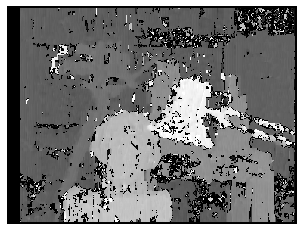

In [4]:
plt.imshow(disparity,'gray')
plt.axis('off')
plt.show()

In [15]:
#cv2.StereoSGBM_create
imgL = cv2.imread("sample_left.png",0)
h,w = imgL.shape
imgR = cv2.imread("sample_right.png",0)
imgR = cv2.resize(imgR,(w,h))

window_size = 3

In [16]:
left_matcher = cv2.StereoSGBM_create(minDisparity=0,numDisparities = 160,
                                    blockSize = 11,
                                    P1=8*3*window_size **2,
                                    P2=32*3*window_size **2,
                                    disp12MaxDiff = 1,
                                    uniquenessRatio = 15,
                                    speckleWindowSize = 0,
                                    speckleRange = 1,
                                    preFilterCap = 63,
                                    mode = cv2.STEREO_SGBM_MODE_SGBM_3WAY)

In [17]:
right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)

lmbda = 80000
sigma = 1.2
visal_multiplyer = 1.0

In [18]:
wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left = left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)

In [19]:
disp_left = left_matcher.compute(imgL, imgR)
disp_right = right_matcher.compute(imgR, imgL)
disp_left = np.int16(disp_left)
disp_right = np.int16(disp_right)

In [20]:
filteredImg = wls_filter.filter(disp_left, imgL, None, disp_right)
filteredImg = cv2.normalize(src = filteredImg, dst = filteredImg,
                           beta = 0, alpha = 255, norm_type = cv2.NORM_MINMAX)
filteredImg = np.uint8(filteredImg)
cv2.imwrite("filtered.jpg",filteredImg)

cv2.imshow("left Image", imgL)
cv2.imshow("st_Disparity Map", filteredImg)

In [ ]:
cv2.waitKey()
cv2.destoryAllWindows()